# (Non) linear fit in Python

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats

## Linear fit in Python with scipy and numpy

Linear regression is very easy to do with `scipy`. The documentation of the package is wonderful, you can find complete examples that can be copied and run in your notebook and very easily adapted to your case.

The simplest kind of linear regression involves taking a set of data ($x_i$,$y_i$), and trying to determine the "best" linear relationship 

$$
y_i = bx_i+a
$$

We will use some interesting data to build our model. We will study Cricket Chirps Vs. Temperature. The data can be found in this csv file

In [4]:
chirps = pd.read_csv('chirps.csv')
chirps.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In the following data

 $X$ = chirps/sec for the striped ground cricket
 
 $Y$ = temperature in degrees Fahrenheit

**Reference**: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

**Data download Link**:

http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr02.html

Let's first change the names of the colummns so that we know what we are dealing with

In [8]:
chirps.columns = ['chirpspersec', 'T']
chirps.head()

,chirpspersec,T
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


Let's look how the data looks like

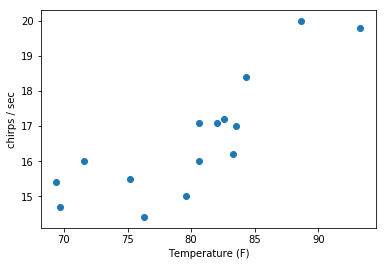

In [13]:
plt.scatter(chirps['T'], chirps['chirpspersec'])
plt.xlabel('Temperature (F)')
plt.ylabel("chirps / sec")
plt.show()

Looking at the data we could try to model it with a linear formula and see what we can get.

In [17]:
b, a, r_value, p_value, slope_std_error = stats.linregress(chirps['T'], chirps['chirpspersec'])

Now we have all the values we need

In [29]:
print('Intercept = ', a)
print('Slope = ', b)
print('R Value = ', r_value)
print('p value = ', p_value)
print('Slope standard error = ', slope_std_error)

Intercept =  -0.309141898181
Slope =  0.211924978337
R Value =  0.835143787031
p value =  0.000106671854996
Slope standard error =  0.0387112259396


Now we can calculate the prediction to plot our results (and some errors while we are at it)

In [30]:
# Calculate some additional outputs
predict_y = a + b * chirps['T']
pred_error = chirps['chirpspersec'] - predict_y
degrees_of_freedom = len(chirps['T']) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

Now that we have the values from our regression we can fit our line and see how it compares with our points

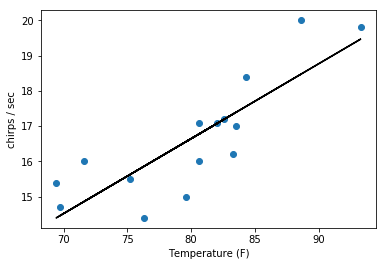

In [21]:
plt.plot(chirps['T'], chirps['chirpspersec'], 'o')
plt.plot(chirps['T'], predict_y, 'k-')
plt.xlabel('Temperature (F)')
plt.ylabel("chirps / sec")
plt.show()

## Non linear fit in Python with scipy and numpy

Note: this example has been taken from a post I wrote on stackoverflow when I explainws a poster how to do non linear fit in Python (Link: https://stackoverflow.com/questions/45033230/multivariate-linear-regression-using-a-defined-function-on-python)

We need to define a function that we will use for fitting our data. In this example `p` is an array containing our input values (sometimes indicated as `x`). In our function we will not do any sanity check (for example if all components of `p` are numbers and so on). This can be done by `curve_fit` using the parameter `check_finite` (Check the documentation [scipy.curve_fit documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.curve_fit.html)). The fit parameters are in this example `a,b,c`. 

In [35]:
def func(p, a, b, c): 
    return a*p[0] + b*(p[0]/(p[0]+p[1]+p[2]))+c

Now let's create some fake data. Our `p_*` arrays will be our input data, and `s_1` will be our expected output. After having defined the data as Python lists, we will convert to numpy arrays.

In [36]:
p_1_data = [6799, 7999, 7999, 7999]
p_2_data = [10199, 10799, 10199, 11999]
p_3_data = [10199, 10799, 10199, 11999]
s_1_data = [3, 2.3, 2.2, 2.2]

xdata = np.vstack((p_1_data, p_2_data, p_3_data))
s_1_data = np.array(s_1_data)


Each column in xdata repsent an observation. So the first element in the first column would be p[0], the second p[1] and the third p[1]. The second column is a separate observation and so on.

In [37]:
print(xdata)
print(s_1_data)

[[ 6799  7999  7999  7999]
 [10199 10799 10199 11999]
 [10199 10799 10199 11999]]
[ 3.   2.3  2.2  2.2]


Now we do the actual fitting, calling the `curve_fit` function.

In [38]:
popt, pcov = curve_fit(func, xdata, s_1_data)

In the `popt` list we wil find the parameters found by the function, and in the `pcov` the covariance matrix.

Note that the algorithm uses the Levenberg-Marquardt algorithm through [leastsq](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq). Note that this algorithm can only deal with unconstrained problems.

In [39]:
print (' fit coefficients (a, b, c):\n', popt)

 fit coefficients (a, b, c):
 [ -6.47154460e-04   5.72580624e-01   7.25686328e+00]


Now let's check the predictions of our model and compare them with the expected values

In [40]:
for i in range(0,4):
    print('Predicted value: ', "%.2f" % func(xdata[:,i], popt[0], popt[1], popt[2]), '- Expected value: ', s_1_data[i])

Predicted value:  3.00 - Expected value:  3.0
Predicted value:  2.24 - Expected value:  2.3
Predicted value:  2.24 - Expected value:  2.2
Predicted value:  2.22 - Expected value:  2.2


Now we cannot plot easily the data since our input data is 3 dimensional, but the prediction gives us an idea of how good we got our model.

Errors on the coefficients can be found on the diagonal of the `pcov` matrix that the function `curve_fit` has calculated for us.

In [41]:
pcov

array([[  8.64429667e-09,  -1.82040566e-04,  -1.86788895e-05],
       [ -1.82040566e-04,   1.26104986e+01,  -1.91481481e+00],
       [ -1.86788895e-05,  -1.91481481e+00,   6.48996702e-01]])